# Binaryzacja


### Cel:
- zapoznanie z segmentacją obiektów poprzez binaryzację,
- zapoznanie z binaryzacją na podstawie histogramu (globalną),
- zapoznanie z metodami automatycznego wyznaczania progu Ots'u, Kitller'a i Kapur'a,
- zapoznanie z binaryzacją lokalną (na podstawie średniej i metodą Sauvola),
- zapoznanie z binaryzacją dwuprogową,
- zadanie domowe: zapoznanie z adaptacyjną binaryzacją lokalną.

### Binaryzacja - wprowadzenie

Jednym z najważniejszych etapów podczas analizy obrazów jest segmentacja -- podział obrazu na rejony według pewnego kryterium  -- jasności, koloru, tekstury.
Najprostszą (i też najczęściej wykorzystywaną) metodą segmentacji jest **binaryzacja**. 
Do jej głównych zalet zalicza się: intuicyjność, prostotę, łatwość implementacji i szybkość wykonywania. 
Jest ona etapem wielu algorytmów analizy obrazów. 
Pozwala na znaczną redukcję informacji w obrazie (np. dla wejściowego obrazu w skali szarości z zakresu 0-255 do 0-1).
 
Binaryzacja najczęściej realizowana jest poprzez progowanie. 
Na przykład: dla obrazu w odcieniach szarości ustala się próg na poziomie $k$. 
Wszystkie piksele o wartości (jasności) większej od $k$ zostają uznane za obiekty, a pozostałe za tło. 
Oczywiście podejście takie daje się zastosować wtedy, gdy obiekty mają istotnie różną jasność od otaczającego je tła.


### Binaryzacja na podstawie histogramu

W rozdziale zostanie zademonstrowane wyznaczanie progu na podstawie "ręcznej" analizy histogramu oraz wpływ szumu i niejednorodnego oświetlenia sceny na proces binaryzacji.

1. Potrzebne w ćwiczeniu moduły są już wpisane - zwróć uwagę pod jakimi nazwami będą one widziane (plt, cv2, np).

2. Wczytaj obraz _coins.png_ w trybie odcieni szarości. Wyświetl go. 
Wyznacz jego histogram (funkcja `np.histogram` lub 'cv2.calcHist') i wyświetl go.
Przy wyświetlaniu histogramu warto zwiększyć liczbę wyświetlanych wartości na osi x oraz powiększyć sam wykres (funkcje *plt.xticks(np.arange(0, 256, 20.0))* oraz *plt.rcParams["figure.figsize"] = (10,5)*.
Uwaga. Proszę powyższą funkcjonalność zaimplementować jako funkcję, gdyż przyda się w dalszej części ćwiczenia.
      


In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/'

fileNames = ["coins.png", "rice.png", "catalogue.png", "bart.png", "figura1.png", "figura2.png", "figura3.png", "figura4.png", "T.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

3. Wizualna analiza histogramu pozwala zauważyć dwa maksima - jedno odpowiadające poziomowi jasności tła (które w tym przypadku jest względnie jednolite - ciemnoszare) i drugie odpowiadające monetom.

Na podstawie histogramu wyznacz próg i wykonaj binaryzację:
- wykorzystaj fakt, że dla macierzy *numpy* można wykonać operację porównania wszystkich jej wartości z liczbą  - wynikiem jest macierz zawierająca wartości *True* i *False*, którą można przekonwertować metodą macierz.astype(np.int) na macierz z wartościami 1 i 0 (aczkolwiek nie jest to tu konieczne).
- wynik binaryzacji wyświetl,
- spróbuj dobrać jak najlepszy próg binaryzacji. Jako "kryterium jakości" przyjmij kształty monet - dla poprawnie dobranego progu powinny to być wypełnione koła.

Uwaga. Proszę powyższą funkcjonalność zaimplementować jako funkcję, gdyż przyda się w dalszej części ćwiczenia.

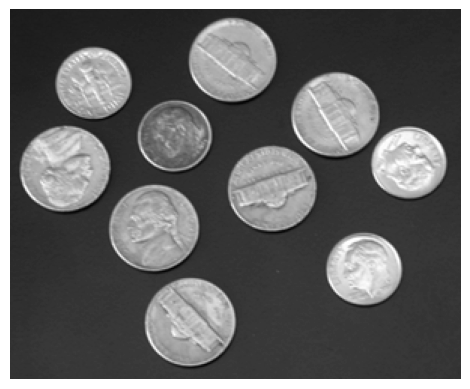

In [2]:
coinsImg = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)
if coinsImg is None: raise ValueError

plt.gray()
plt.axis('off')
plt.imshow(coinsImg)

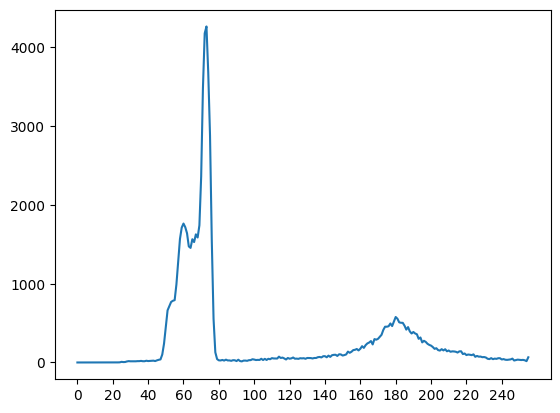

In [3]:
def showHist(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.xticks(np.arange(0, 256, 20.0))
    plt.rcParams["figure.figsize"]
    plt.plot(hist)
#

def showHistGray(ax, image, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    ax.set_title(title)
    ax.set_xticks(np.arange(0, 256, 20.0))
    ax.plot(hist)
#

showHist(coinsImg)

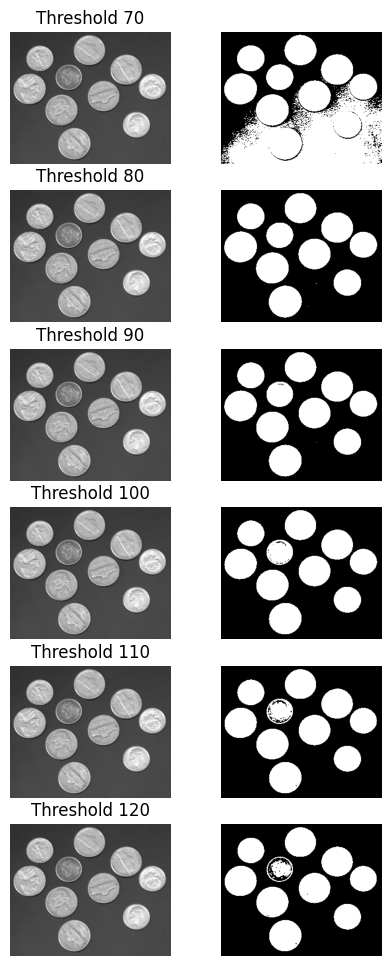

In [4]:
def showImageGray(ax, image):
    ax.axis('off')
    ax.imshow(image, 'gray', vmin=0, vmax=256)
#

def showImageGrayPlt(image):
    plt.axis('off')
    plt.imshow(image, 'gray', vmin=0, vmax=256)
    
# 0 - black, 1 - white
def binarizationThreshold(ax, image, threshold):
    newImage = (image > threshold).astype(np.int32)
    ax.axis('off')
    ax.imshow(newImage)
    # showImageGray(ax, newImage)
#

_, axs = plt.subplots(6, 2, figsize=(5, 12))
thresholds = [70, 80, 90, 100, 110, 120]
for a in range(6):
    axs[a][0].set_title(f"Threshold {thresholds[a]}")
    showImageGray(axs[a][0], coinsImg)
    binarizationThreshold(axs[a][1], coinsImg, thresholds[a])

4. Na "stopień trudności" przeprowadzenia binaryzacji największy wpływ mają dwa czynniki:
- szum,
- niejednorodne oświetlenie.
	  
Użyj obrazy:
 - _figura1.png_ (bez zaszumienia),
 - _figura2.png_ (dodany szum Gaussowski o średniej 0 i odchyleniu standardowym 10),
 - _figura3.png_ (dodany szum Gaussowski o średniej 0 i odchyleniu standardowym 50),
 - _figura4.png_ (dodany gradient oświetlenia -- symulacja oświetlenia niejednorodnego) i wyświetl ich histogramy (wykorzystaj funkcję z poprzedniego punktu).


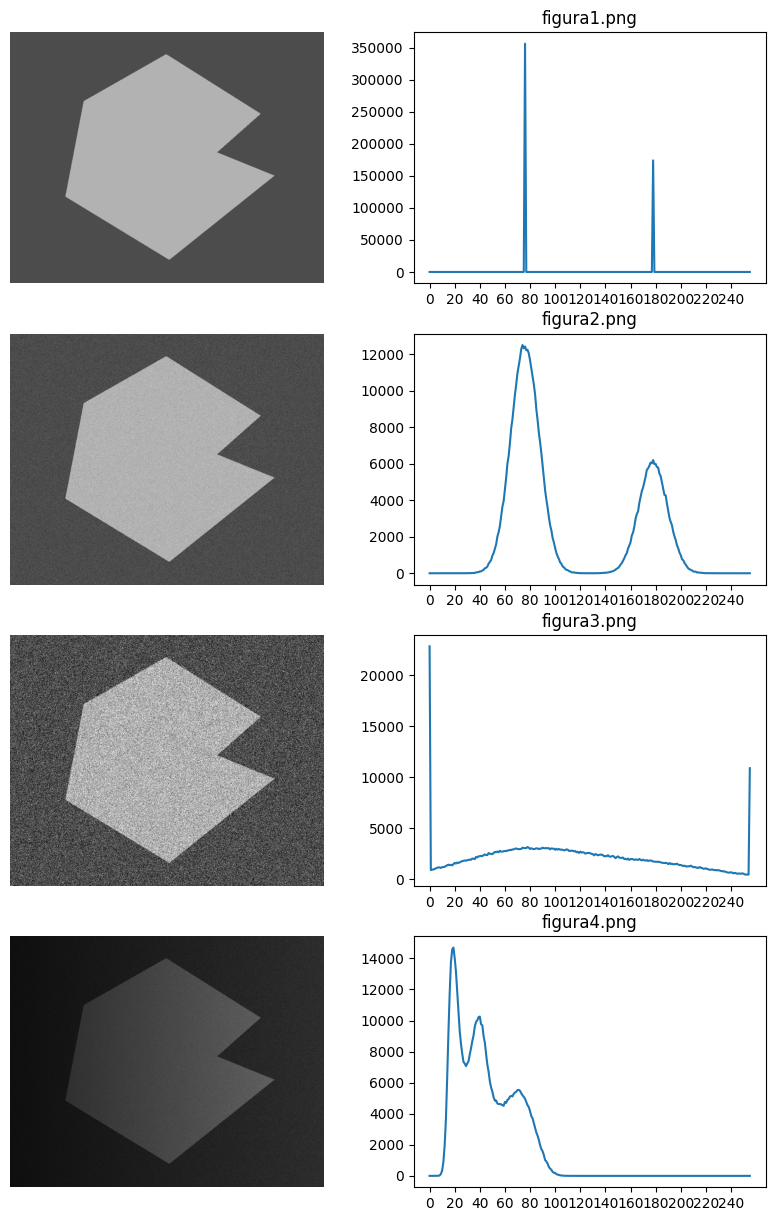

In [5]:
_, axs = plt.subplots(4, 2, figsize=(10, 15))
images = ['figura1.png', 'figura2.png', 'figura3.png', 'figura4.png']
fig1, fig2, fig3, fig4 = cv2.imread('figura1.png', cv2.IMREAD_GRAYSCALE), cv2.imread('figura2.png', cv2.IMREAD_GRAYSCALE), cv2.imread('figura3.png', cv2.IMREAD_GRAYSCALE), cv2.imread('figura4.png', cv2.IMREAD_GRAYSCALE)

imagesS = [fig1, fig2, fig3, fig4]

for a in range(4):
    showImageGray(axs[a][0], imagesS[a])
    showHistGray(axs[a][1], imagesS[a], images[a])

Spróbuj wyznaczyć progi binaryzacji na podstawie wyświetlonych histogramów.
Jak dodanie szumu wypłynęło na histogram i łatwość wyznaczania progu binaryzacji?
Czy jest to możliwe we wszystkich przypadkach?

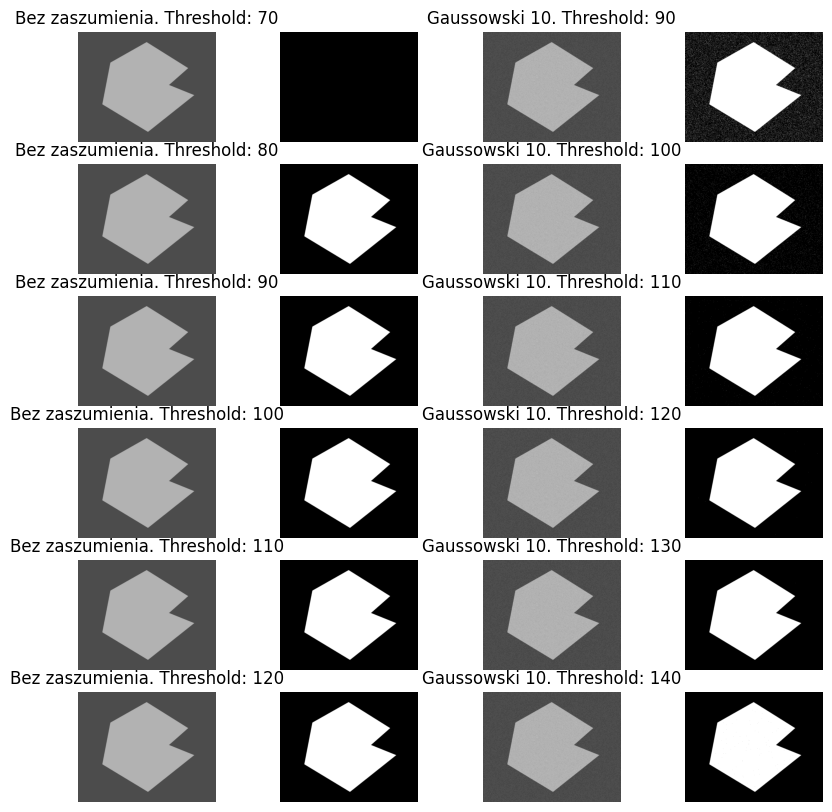

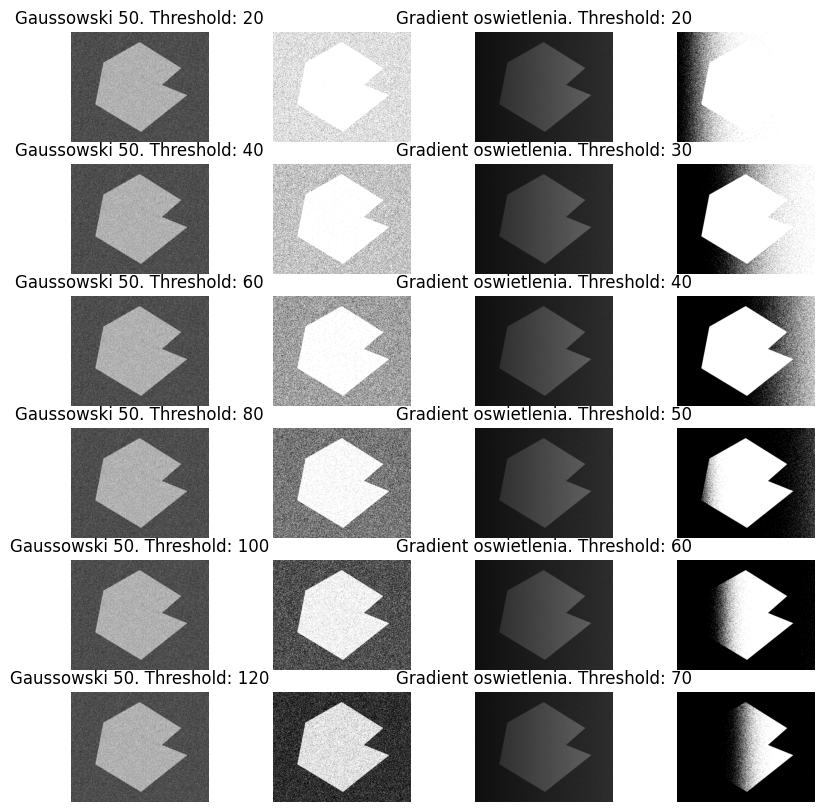

In [6]:
_, axs = plt.subplots(6, 4, figsize=(10, 10))
thresholds = [70, 80, 90, 100, 110, 120]
for a in range(6):
    axs[a][0].set_title(f"Bez zaszumienia. Threshold: {thresholds[a]}")
    showImageGray(axs[a][0], imagesS[0])
    binarizationThreshold(axs[a][1], imagesS[0], thresholds[a])

thresholds = [90, 100, 110, 120, 130, 140]
for a in range(6):
    axs[a][2].set_title(f"Gaussowski 10. Threshold: {thresholds[a]}")
    showImageGray(axs[a][2], imagesS[1])
    binarizationThreshold(axs[a][3], imagesS[1], thresholds[a])

_, axs = plt.subplots(6, 4, figsize=(10, 10))
thresholds = [20, 40, 60, 80, 100, 120]
for a in range(6):
    axs[a][0].set_title(f"Gaussowski 50. Threshold: {thresholds[a]}")
    showImageGray(axs[a][0], imagesS[2])
    binarizationThreshold(axs[a][1], imagesS[2], thresholds[a])

thresholds = [20, 30, 40, 50, 60, 70]
for a in range(6):
    axs[a][2].set_title(f"Gradient oswietlenia. Threshold: {thresholds[a]}")
    showImageGray(axs[a][2], imagesS[3])
    binarizationThreshold(axs[a][3], imagesS[3], thresholds[a])


### Automatyczne wyznaczanie progu binaryzacji

W automatycznym systemie analizy obrazów (działanie bez nadzoru operatora) konieczne jest zastosowanie metody binaryzacji, która w sposób automatyczny wyznacza próg binaryzacji.
Oczywiście można sobie wyobrazić użycie stałego progu (np. 10), ale wtedy należy zadbać o niezmienność warunków oświetleniowych, co w niektórych zastosowaniach może być problematyczne.

#### Iteracyjne wyznaczenie progu

Jednym z najprostszych podejść jest iteracyjna procedura wyliczania progu.
Jako pierwsze przybliżenie progu ($k$) przyjmuje się średnia jasność na obrazie.
Następnie, na podstawie $k$,  dzieli się obraz na dwa podobrazy $I_0$ i  $I_1$ (dwie klasy $C_0$ i $C_1$).
Dla każdego z nich oblicza się średnią jasność: $m_0$ i $m_1$.
Jako nowy próg przyjmuje się:
\begin{equation}
k_{new} = \frac{m_0 + m_1}{2}
\end{equation}
Procedurę kontynuuje się do momentu, aż różnica pomiędzy dwoma kolejnymi progami będzie mniejsza niż zadana wartość.


**Zadanie: zaimplementować opisany powyżej algorytm.**


Jak można zauważyć, do poprawnego działania metody potrzebne będzie obliczanie średniej jasności, również dla pewnych podobrazów.
Wykorzystamy do tego znormalizowanych histogram:
\begin{equation}
p_i = n_i/N,   \sum_{i=0}^L p_i = 1
\end{equation}
gdzie: $n_i$ liczba pikseli o jasności $i$ ($i = 0,1, ... L-1$) - histogram, $L$ - liczba poziomów jasności, $N$ - liczba pikseli na obrazie ($N = n_0 + n_1 + ... + n_{L-1}$).

Jeśli podzielimy obraz na dwie klasy $C_0$ i $C_1$ (tło i obiekty albo obiekty i tło) z progiem podziału oznaczonym jako $k$, to do klasy $C_0$ należeć będą piksele o poziomach $[0,k]$, a do klasy $C1$ piksele o poziomach $[k+1,L-1]$.

Wtedy prawdopodobieństwo, że piksel należy do klasy $C_0$ wynosi:
\begin{equation}
P_0(k) = \sum_{i=0}^{k} p_i
\end{equation}

Podobnie prawdopodobieństwo, że należy do klasy $C_1$ wynosi:

\begin{equation}
P_1(k) = \sum_{i=k+1}^{L-1} p_i = 1 - P_0(k)
\end{equation}

Średnią jasność pikseli należących do klasy $C_0$ można wyznaczyć na podstawie:

\begin{equation}
m_0(k) = \sum_{i=0}^{k} iP(i|C_0)
\end{equation}

gdzie: $|$ oznacza prawdopodobieństwo warunkowe, a wyraz $P(i|C_0)$ - prawdopodobieństwo dla wartości $i$ pod warunkiem, że $i$ należy do klasy $C_0$.
Równanie to jest szczególnym przypadkiem wykorzystania momentów statystycznych do wyliczania pewnych parametrów statystycznych - w tym przypadku średniej.

Wykorzystując regułę Bayesa:

\begin{equation}
P(A|B) = P(B|A)P(A)/P(B)
\end{equation}
możemy zapisać:

\begin{equation}
m_0(k) = \sum_{i=0}^{k} i P(C_0|i)P(i)/P(C_0)
\end{equation}
Wyraz $P(C_0|i) = 1$, gdyż z założenia rozpatrujemy tylko piksele należące do klasy $C_0$.
Wyraz $P(i)$ stanowi $i$-ty element znormalizowanego histogramu tj. $P(i) = p_i$, a $P(C_0)$ to prawdopodobieństwo przynależności do klasy $C_0$ określone wcześniej $P(C_0) = P_0(k)$.
Ostatecznie możemy więc zapisać:

\begin{equation}
m_0(k) = \frac{1}{P_0(k)} \sum_{i=0}^{k} i p_i
\end{equation}

Na podstawie analogicznych rozważań można wyprowadzić wzór na średnią jasności pikseli należących do klasy $C_1$:
\begin{equation}
m_1(k) = \frac{1}{P_1(k)} \sum_{i=k+1}^{L-1} i p_i
\end{equation}

Średnia jasność całego obrazu dana jest zależnością:
\begin{equation}
m_G = \sum_{i=0}^{L-1} ip_i
\end{equation}


1. Wczytaj obraz _coins.png_. Wyświetl go.

2. Wylicz histogram i histogram skumulowany (funkcja `np.cumsum`).
   Na podstawie zależności (\ref{eq:thresholding:meanHistGlobal}) wylicz średnią - pierwszy próg podziału $k$.
   Uwagi:
   - przed dalszymi obliczeniami dobrze jest usunąć zbędny wymiar tablicy z histogramem - polecenie `np.squeeze`
    - $p_i$ to nasz znormalizowany histogram, a wartości od $0$ do $255$ można wygenerować poleceniem `np.arange(256)`,
    - zmiast pętli `for` można wykorzystać iloczyn sklarny dwóch wektorów tj. `np.dot`.

3.  W nieskończonej petli `while` wykonaj następujące kroki:
- oblicz średnią $m_0$ -- zależność (\ref{eq:thresholding:meanHistC0}):
    - dla $P_0$ wystarczy wykorzystać odpowiednią wartość znormalizowanego histogramu skumulowanego, dla pozostałej części wyrażenia podobne rozwiązanie jak dla pierwszej średniej,
- oblicz średnią $m_1$ -- zależność (\ref{eq:thresholding:meanHistC1}),
- oblicz nowy próg $k_{new}$ -- zależność (\ref{eq:thresholding:mean_auto}),
- oblicz moduł z różnicy pomiędzy $k_{new}$, a $k$ i sprawdź czy jest mniejszy od progu (np. $1$),
- jeśli tak to zakończ obliczenia (`break`), jeśli nie to przypisz $k = k_{new}$ i kontynuuj obliczenia,
- wyświetl próg oraz wynik binaryzacji.

4. Sprawdz jak metoda dziala na obrazach _figura1.png_ do _figura4.png_. 

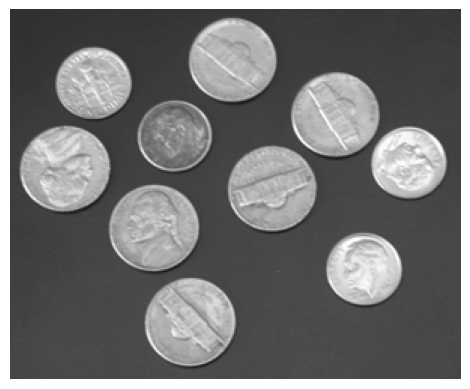

In [7]:
showImageGray(plt, coinsImg)


In [8]:
def binarizationIterativeThreshold(image, epsilon=1/3):
    hist = np.squeeze(cv2.calcHist([image], [0], None, [256], [0, 256]) / image.size)
    
    last_k = -100
    k = np.arange(0, 256) @ hist
    
    while abs(k - last_k) > epsilon:
        k = int(np.ceil(k))
        
        m_0 = (np.arange(0, k) @ hist[:k]) / np.sum(hist[:k])
        m_1 = (np.arange(k, 256) @ hist[k:]) / np.sum(hist[k:])
        
        last_k = k
        k = (m_0 + m_1) / 2
    #
    return k
#

In [9]:
def binarizationIterativeThresholdVer2(image, epsilon=1/3):
    #
    k = np.mean(image)
    new_k = k

    while abs(k - new_k) > epsilon:
        C0 = image[image < k]
        C1 = image[image >= k] 

        meanC0 = np.mean(C0) if len(C0) > 0 else 0 
        meanC1 = np.mean(C1) if len(C1) > 0 else 0 

        k = new_k 
        new_k = (meanC0 + meanC1) / 2 
    #

    return k
#

127.0 126.97512938867084 118.1335311594729 48.86432933803929
109.48125544899739 109.45831210347339 110.04000460452073 43.55220658446465


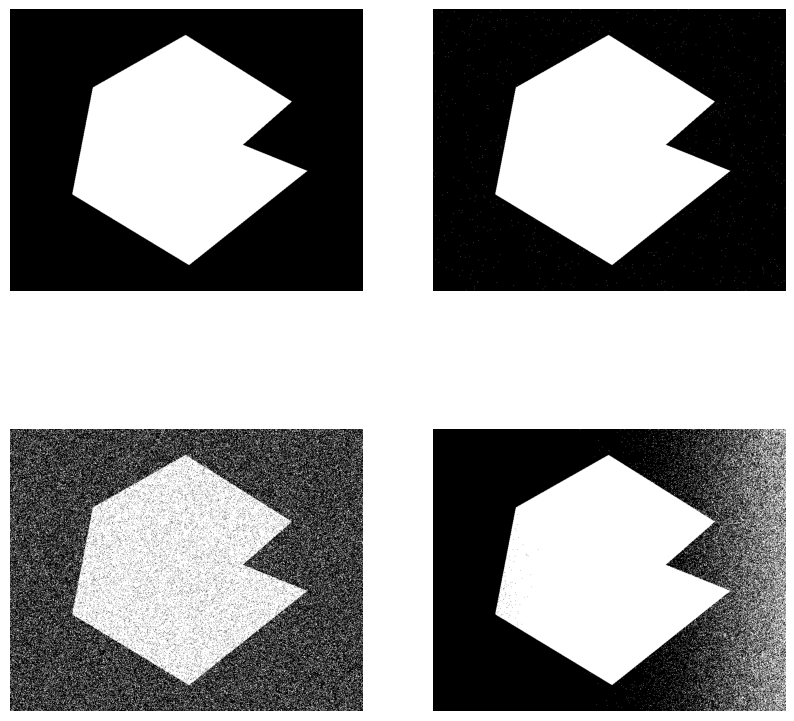

In [10]:
fig1T = binarizationIterativeThreshold(imagesS[0])
fig2T = binarizationIterativeThreshold(imagesS[1])
fig3T = binarizationIterativeThreshold(imagesS[2])
fig4T = binarizationIterativeThreshold(imagesS[3])

print(fig1T, fig2T, fig3T, fig4T)

fig1T = binarizationIterativeThresholdVer2(imagesS[0])
fig2T = binarizationIterativeThresholdVer2(imagesS[1])
fig3T = binarizationIterativeThresholdVer2(imagesS[2])
fig4T = binarizationIterativeThresholdVer2(imagesS[3])

print(fig1T, fig2T, fig3T, fig4T)

_, axs = plt.subplots(2, 2, figsize=(10, 10))
binarizationThreshold(axs[0][0], imagesS[0], fig1T)
binarizationThreshold(axs[0][1], imagesS[1], fig2T)
binarizationThreshold(axs[1][0], imagesS[2], fig3T)
binarizationThreshold(axs[1][1], imagesS[3], fig4T)

#### Metoda Otsu

Jednym z częściej wykorzystywanych algorytmów wyznaczania progu jest metoda zaproponowana w roku 1979 przez Nobuyuki Otsu w artykule pt. "A Threshold Selection Method from Gray-Level Histograms" (można odszukać na IEEE Xplore).
W algorytmie zakłada się, że obraz zawiera piksele należące do dwóch klas (obiektów i tła) tj. histogram obrazu jest bi-modalny (ma dwa maksima).
Próg podziału obliczany jest tak, aby wariancja międzyklasowa była maksymalna.
W tym sensie metodę Otsu można nazwać optymalną.

Wprowadźmy teraz wskaźnik "jakości" wybranego progu podziału $k$, który będziemy optymalizować.
W algorytmie Otsu jest to:

\begin{equation}
\eta(k) = \frac{\sigma^2_B(k)}{\sigma^2_G}
\end{equation}
gdzie:  $\sigma^2_G$ - wariancja globalna, która może zostać obliczona na podstawie momentów statystycznych jako:

\begin{equation}
\sigma^2_G =  \sum_{i=0}^{L-1} (i - m_G)^2 p_i
\end{equation}
a $\sigma^2_B$ jest wariancją międzyklasową, która jest zdefiniowana jako:
\begin{equation}
\sigma^2_B(k) =  P_0(k)(m_0(k) - m_G)^2 + P_1(k)(m_1(k) - m_G)^2
\end{equation}
Równianie to można również przekształcić do:
\begin{equation}
\sigma^2_B(k) =  P_0(k)P_1(k)(m_0(k) - m_1(k))^2 = \frac{(m_G P_0(k) - m(k) )^2}{P_0(k)(1-P_0(k))}
\end{equation}
gdzie:
\begin{equation}
m(k) = \sum_{i=0}^{k} i p_i
\end{equation}

Taki zapis pozwala przyspieszyć obliczenia.
Wartość $m_G$ wyznaczana jest jednokrotnie, a zachodzi tylko potrzeba obliczania $m(k)$ i $P_0(k)$ w każdej iteracji.
Warto też zwrócić uwagę, że równanie ma sens dla $P_0 > 0$.

Warto zauważyć, że z postaci równania (\ref{eq:thresholding:otsu:sigma_B_2}) wynika, że im większa odległość pomiędzy średnimi $m_0$ i $m_1$ tym wartość wariancji międzyklasowej jest większa.
Pokazuje to, że przyjęty współczynniki może być podstawą do separacji dwóch klas - im jego wartość jest większa, tym lepsze rozdzielenie.
Dodatkowo, z równania (\ref{eq:thresholding:otsu:eta}) wynika, że $\eta(k)$ zależy tylko od wariancji międzyklasowej $\sigma^2_B(k)$, gdyż wariancja globalna $\sigma^2_G$ jest stała.
Zatem w procesie optymalizacji należy dążyć do maksymalizacji wskaźnika $\eta$.

Należy też pamiętać, że współczynnik jest poprawnie określony tylko dla wartości $\sigma^2_G > 0$.
Przy czym, wartość $0$ może on przyjąć tylko dla obrazu o jednym poziomie szarości - w takim przypadku trudno mówić o podziale pikseli na dwie klasy (skoro występuje tylko jedna).

Ostatecznie optymalny próg binaryzacji $\bar{k}$ wyliczamy na podstawie zależności:
\begin{equation}
\sigma^2_B(\bar{k}) \max\limits_{k \in[0,L-1]} {\sigma^2_B(k) }
\end{equation}

Uwagi:
- może się zdarzyć, że znajdziemy więcej niż jedno maksimum tj. więcej wartości $\bar{k}$.
  W takim przypadku zwykle zakłada się, że próg będzie średnią otrzymanych wartości.
- liczby $P_0(\bar{k})$ i $P_1(\bar{k})$ odpowiadają powierzchni zajmowanej przez obiekty klas $C_0$ i $C_1$.
- liczby $m_0(\bar{k})$ i $m_1(\bar{k})$ odpowiadają średniej jasności obiektów klas $C_0$ i $C_1$.
- wartość parametru $\eta(\bar{k})$ określa "jakość" wyznaczonego progu -- im większa tym lepiej.

Zadanie: wykorzystując podane powyżej informacje należy zaimplementować metodę wyznaczania progu binaryzacji zaproponowaną przez Otsu.

1. Wczytaj obraz _coins.png_.
      Wyświetl go.

2. Wyznacz jego histogram znormalizowany oraz oblicz średnią jasność (można do tego wykorzystać histogram) - kod zbliżony do stworzonego wcześniej.

3. Zdefiniuj 256-elementowy wektor na współczynniki $\sigma_B^2$ (funkcja `np.zeros`).

4. W pętli po możliwych wartościach progu binaryzacji wyznacz wartość $\sigma_B^2(k)$ na podstawie zależności (\ref{eq:thresholding:otsu:sigma_B_2}).
      Uwagi:
      - wcześniejszego liczenia wartości $P_0(k)$ i $m(k)$ można uniknąć inkrementując wartośc $P_0, m$  w każdej iteracji.
      - należy pamiętać, że równanie ma sens tylko dla $0 < P_0(k) < 1$. <br>

5. Wyświetl przebieg $\sigma_B^2(k)$.
      Wykorzystaj funkcję `plt.plot`.

6. Wyznacz wartość $\bar{k}$ dla której współczynnik $\sigma_B^2$ jest maksymalny.
	  Można to zrobić poprzez dodanie instrukcji w pętli (rozwiązanie bardziej elegancie) lub wykorzystując funkcję `max` (rozwiązanie dla leniwych).
	  Uwaga. Proszę pominąć obsługę przypadków niejednoznacznego maksimum.

7. Zbinaryzuj obraz wykorzystując otrzymany próg.
      Porównaj wyniki z rezultatem binaryzacji "ręcznej".

8. W OpenCV dostępna jest implementacja metody Otsu - funkcja `cv2.threshold` z parametrem `cv2.THRESH_OTSU`.
      Funkcja zwraca zbinaryzowany obraz oraz próg.
      Wykonaj binaryzację obrazu _coins.png_ metodą Otsu.
      Porównaj wyniki z własną implementacją - powinno wyjść tak samo (tzn. taki sam próg).

9. Przeprowadź eksperyment również na obrazie _rice.png_ i _catalogue.png_

In [11]:
def OTSU(image):
    #
    hist = np.squeeze(cv2.calcHist([image], [0], None, [256], [0, 256]) / image.size)

    m_G = np.mean(image) 
    sigma_B_sq = np.zeros(256) 
    P_0 = 0
    m_k = 0

    for k in range(1, 257):
        P_0 += hist[k - 1]
        if not 0.0 < P_0 < 1.0: continue 

        m_k += (k - 1) * hist[k - 1]
        # m_k = np.arange(0, k) @ hist[:k] 
        sigma_B_sq[k - 1] = np.square(m_G * P_0 - m_k) / (P_0 * (1 - P_0))
    #
    
    return np.argmax(sigma_B_sq), sigma_B_sq
#

Threshold coins: 126


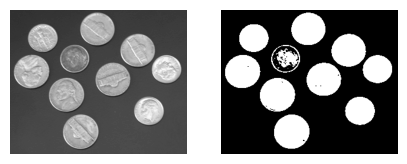

In [12]:
threshold, sigma_B_sq = OTSU(coinsImg)
print(f"Threshold coins: {threshold}")

_, axs = plt.subplots(1, 2, figsize=(5, 5))
showImageGray(axs[0], coinsImg)
binarizationThreshold(axs[1], coinsImg, threshold)

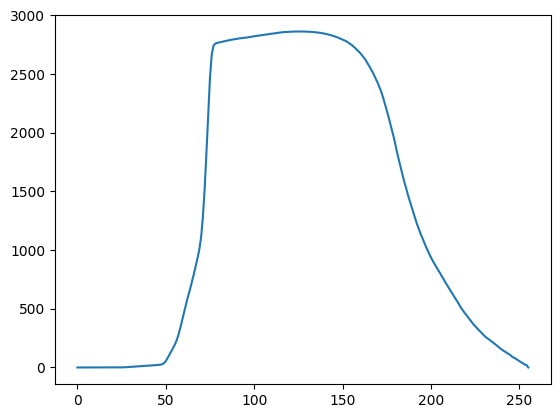

In [13]:
plt.plot(sigma_B_sq)

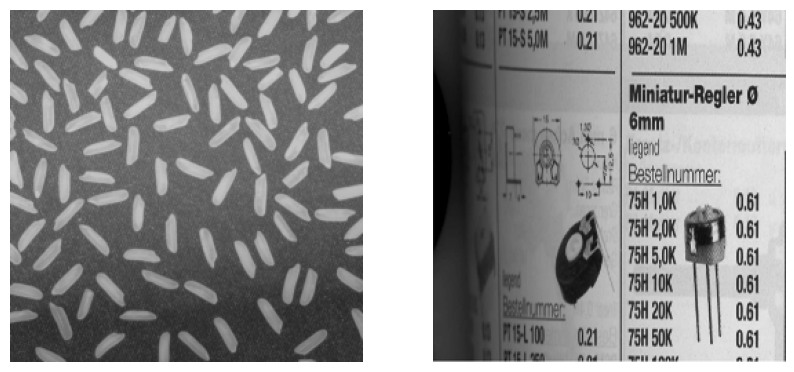

In [14]:
riceImg = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)
catalogueImg = cv2.imread('catalogue.png', cv2.IMREAD_GRAYSCALE)

_, axs = plt.subplots(1, 2, figsize=(10, 10))
showImageGray(axs[0], riceImg)
showImageGray(axs[1], catalogueImg)

In [15]:
thresholdRice, _ = OTSU(riceImg)
thresholdCatalogue, _ = OTSU(catalogueImg)

Threshold rice: 126
Threshold catalogue cv2: 131.0


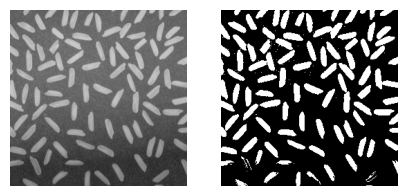

In [16]:
print(f"Threshold rice: {threshold}")

_, axs = plt.subplots(1, 2, figsize=(5, 5))
showImageGray(axs[0], riceImg)
binarizationThreshold(axs[1], riceImg, threshold)

val, _ = cv2.threshold(riceImg, 0, 255, cv2.THRESH_OTSU)
print(f"Threshold catalogue cv2: {val}")

Threshold catalogue: 126
Threshold catalogue cv2: 128.0


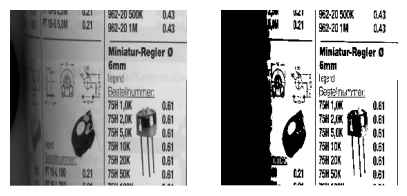

In [17]:
print(f"Threshold catalogue: {threshold}")

_, axs = plt.subplots(1, 2, figsize=(5, 5))
showImageGray(axs[0], catalogueImg)
binarizationThreshold(axs[1], catalogueImg, threshold)

val, _ = cv2.threshold(catalogueImg, 0, 255, cv2.THRESH_OTSU)
print(f"Threshold catalogue cv2: {val}")

### Binaryzacja lokalna


Analiza wyników binaryzacji dla obrazów _rice.png_ i _catalogue.png_ pokazuje, że globalna binaryzacja nie najlepiej działa dla obrazów o niejednorodnym oświetleniu.
Dla obu obrazów trudno również wyznaczyć odpowiedni próg "ręcznie".

Metodą, która pozwala poprawić wyniki binaryzacji, jest binaryzacja lokalna (niekiedy zwana adaptacyjną).
W jednym z wariantów polega ona na wyznaczeniu progu osobno dla każdego piksela na podstawie jego otoczenia (tj. własności jego kontekstu, okna).

1. Dla uproszczenia zakładamy, że obraz ma rozmiar $256 \times 256$ pikseli. Przyjmijmy okno analizy o rozmiarze 15 pikseli.

2. Najprostsza wersja binaryzacji lokalnej zakłada, że próg binaryzacji dla danego okna to średnia z pikseli w tym oknie.

3. Wczytaj obraz _rice.png_. Rozmiar obrazka (`X,Y`) można uzyskać stosując taką składnię: `(X, Y) = obraz.shape`.

4. Podstawą algorytmu są dwie pętle `for` iterujące po pikselach obrazka:


	for j in range(W/2, Y-W/2):
	    for i in range(W/2, X-W/2):

5. Wewnątrz pętli należy dla każdego piksela wyciąć jego otoczenie o rozmiarze `W` (operator `:`), wyznaczyć z niego średnią (metoda `mean`) i na jej podstawie dokonać binaryzacji.

6. Wyświetl obrazy oryginalny i zbinaryzowany.

7. Zaobserwuj rezultaty działania metody dla obrazów _rice.png_ i _catalogue.png_.
      Poeksperymentuj z rozmiarem okna (proszę nie przesadzać z rozmiarem, gdyż istotnie wpływa on na czas obliczeń).
      Jaka jest podstawowa wada zaimplementowanej metody? (pomijając złożoność obliczeniową).
      Proszę się zastanowić jakie jest źródło błędów.

In [18]:
X, Y = riceImg.shape 

def LocalBinarization(image, window):
    X, Y = image.shape
    WS = window // 2 

    binarized = np.copy(image)
    for j in range(WS, Y - WS):
        for i in range(WS, X - WS):
            binarized[i, j] = [0, 255][(image[i, j] > np.mean(image[i - WS:i + WS, j - WS:j + WS])).astype(np.int32)]
            
    #

    return binarized
#

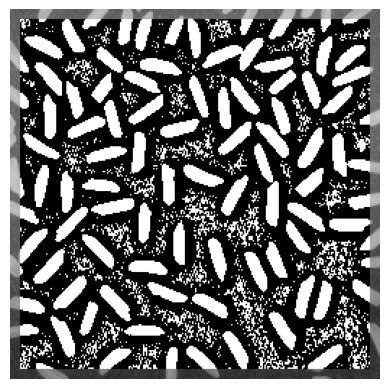

In [19]:
riceBinarized = LocalBinarization(riceImg, 15)
showImageGrayPlt(riceBinarized)

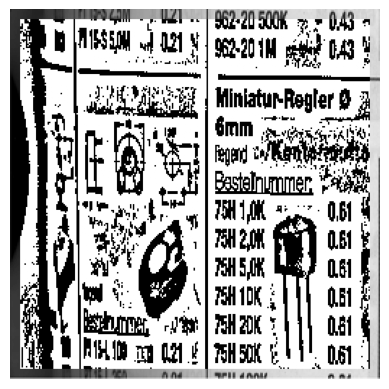

In [20]:
catalogueBinarized = LocalBinarization(catalogueImg, 15)
showImageGrayPlt(catalogueBinarized)

8. Jakość działania binaryzacji lokalnej można poprawić wyznaczając próg za pomocą metody Sauvol'i i Pietikainen'a zaproponowanej w artykule *Adaptive document image binarization*.
Wykorzystuje ona, oprócz średniej, informację o odchyleniu standardowym w danym oknie.
Próg binaryzacji wyznaczany jest na podstawie zależności:
\begin{equation}
T = srednia \{1 \pm k (\frac{odchStd}{R}-1) \}
\end{equation}
gdzie: $k$ i $R$ to parametry ($R$ zwykle $128$, a $k$ na początek przyjmij $0.15$), $srednia$ i $odchStd$ to odpowiednio średnia i odchylenie standardowe wyliczone w oknie.

9. Zaimplementuj algorytm Sauvoli - wykorzystaj do wyznaczenia średniej i odchylenia metody `mean()` oraz `std()` liczone dla wycinka (podobnie jak średnia w poprzedniej metodzie).
      
10. Uruchom metodę (uwaga - czas obliczeń nie jest krótki). Przeanalizuj wyniki. Zwróć uwagę, że dodanie informacji o odchyleniu standardowym powinno *poprawić* wyniki binaryzacji.
      Jeżeli dzieje się inaczej, to najprawdopodobniej implementacja zawiera błąd. 
     
11. Zastanów się nad znaczeniem symbolu $\pm$ we wzorze na próg. 
      Kiedy należy zastosować znak +, a kiedy -.

12. Porównaj jakość binaryzacji lokalnej metodą Sauvol'i i z progiem na podstawie średniej. 
      Poeksperymentuj z rozmiarem okna i parametrem k (dla obrazów _rice.png_ i _catalogue.png_).

In [21]:
k = 0.15 
R = 128 

def SauvoliBinarization(image, window=15, sign=-1):
    X, Y = image.shape
    WS = window // 2 

    binarized = np.copy(image)
    for j in range(WS, Y - WS):
        for i in range(WS, X - WS):
            mean = np.mean(image[i - WS:i + WS, j - WS:j + WS])
            std  = np.std(image[i - WS:i + WS, j - WS:j + WS])

            T = mean * (1 + sign * k * (std / R - 1))
            binarized[i, j] = [0, 255][(image[i, j] > T).astype(np.int32)]
        #
    #

    return binarized
#

Sign odwraca kolory


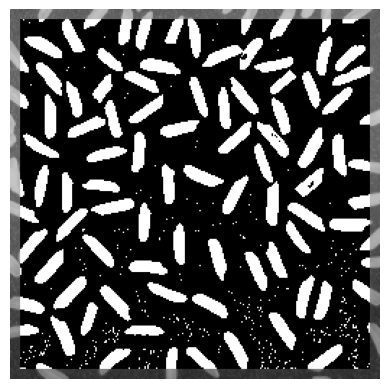

In [29]:
riceBinarized = SauvoliBinarization(riceImg, 15, -1)
showImageGrayPlt(riceBinarized)

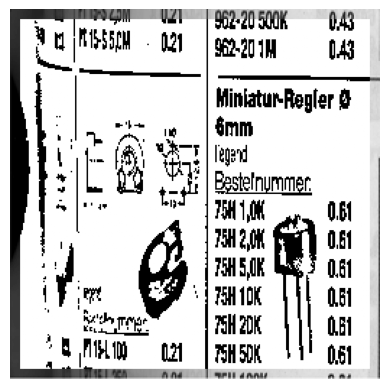

In [23]:
catalogueBinarized = SauvoliBinarization(catalogueImg, 15, sign=1)
showImageGrayPlt(catalogueBinarized)

### Binaryzacja dwuprogowa

Binaryzację można przeprowadzić wykorzystując więciej niż jedn próg.
Przykładem jest binaryzacja dwuprogowa - wybieramy w ten sposób przedział jasności (piksele w nim zawarte klasyfikujemy jako obiekty).

1. Wczytaj obraz _bart.png_. 
Wyświetl go, wyznacz i wyświetl jego histogram.
Oceń, który fragment histogramu odpowiada kolorowi skóry Barta Simpsona.<br>
**UWAGA - Aby odczytać wartości pikseli można zapisać obrazek na dysku (`cv2.imwrite('Nazwa.png', Image)`), a następnie odczytać wartościa programem do edycji obrazów, np. *paint*.**<br>

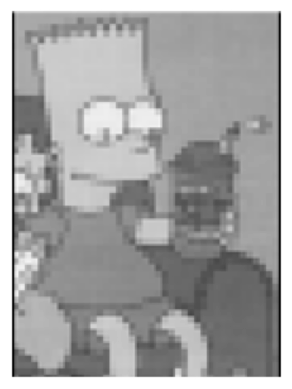

In [24]:
bartImg = cv2.imread('bart.png', cv2.IMREAD_GRAYSCALE)

showImageGrayPlt(bartImg)

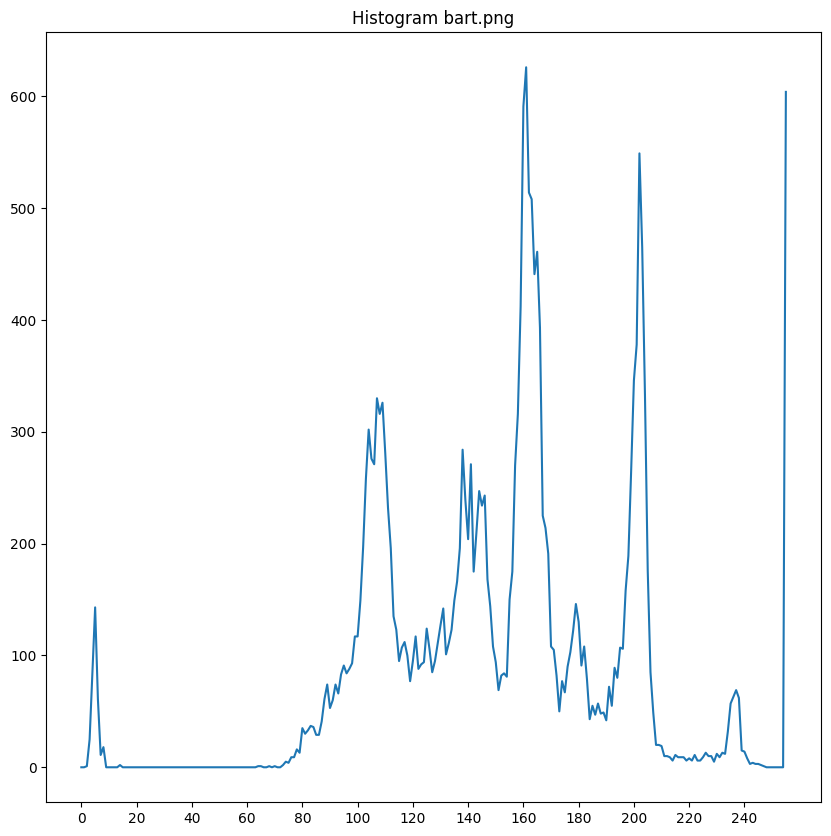

In [25]:
_, axs = plt.subplots(1, 1, figsize=(10, 10))
showHistGray(axs, bartImg, "Histogram bart.png")

2. Przeprowadź segmentację na podstawie koloru skóry (binaryzację dwuprogową). 
      Wykorzystaj przekształcenie obrazów z wartościami True, False na wartości 1,0 i mnożenie obrazów.
 
3. Wynik wyświetl.

In [26]:
def Binarization2Threshold(image, threshold1, threshold2):
    return 255 * np.logical_and(threshold1 < image, image < threshold2).astype(np.int32)
#

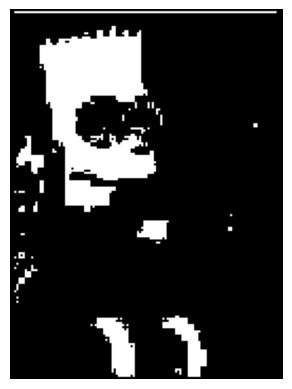

In [27]:
binarizedBart = Binarization2Threshold(bartImg, 190, 210)
showImageGrayPlt(binarizedBart)